# **Projet n°6 - MMCN (702)**

#

# Réseau de Hopfield : Modèle de la mémoire associative

- Etudiant 1 : **Océane LI** (n_etudiant : 28602519)

- Etudiant 2 : **Adam BOUMESSAOUD** (n_etudiant : 28710653)

Imaginez que l'on vous demande de mémoriser 6 numéros de téléphone (6 images différentes, 6 phrases, etc.). Après une période d'apprentissage, on vous présente les premiers chiffres d'un de ces numéros (ou une partie d'un des images ou des phrases). Vous vous rappelez automatiquement le numéro ou l'image mémorisé correspondant. Quel est le mécanisme neuronal sous tendant ce type de mémoire, appelé **"mémoire associative"** ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Construction du modèle

On considère le réseau de Hopfield avec $K = 25$ neurones. La dynamique du potentiel de membrane pour chaque neurone du réseau est décrite par l'équation suivante :

\begin{align*}
\frac{dy{_k}}{dt} = -y{_k} + g (\sum_{i=1}^{K} w{_{ki}}y{_i}) &&&&&&&&&&& (1)
\end{align*}

avec la tangente hyperbolique comme fonction d'activation (cette fonction est souvent utilisée au lieu de la fonction sigmoïde) :

\begin{align*}
g(a) = tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}} &&&&&&&&&&& (2)
\end{align*}

On utilisera l'ensemble des motifs suivants pour tester le modèle :

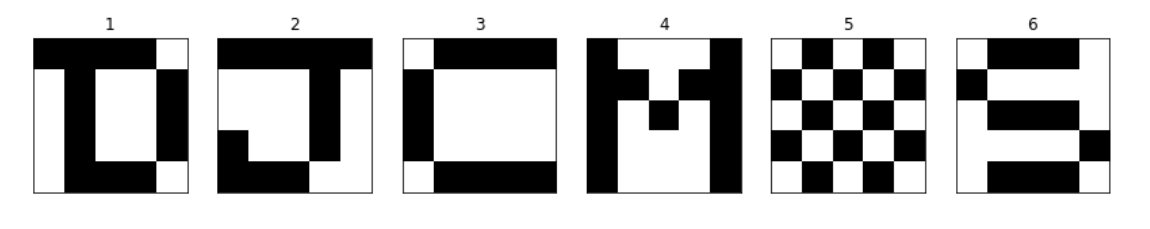

#

Chaque motif correspond au vecteur d'activités $\overrightarrow{y} = (y{_1}, y{_2}, ..., y{_k})$, avec $y{_k} = -1$ pour les pixels noirs et $y{_k} = +1$ pour les pixels blancs.

Afin de stocker $N$ motifs dans la mémoire, on fixe les poids synaptiques aux valeurs hebbiennes :

\begin{align*}
w{_{ki}} = \frac{1}{N} \sum_{n=1}^{N} y{_k}^{(n)} y{_i}^{(n)} &&&&&&&&&&& (3)
\end{align*}

**Explication :**
La formule des poids synaptiques est basée sur la règle de Hebb, une règle d'apprentissage qui énonce que la force d'une connexion synaptique entre 2 neurones doit être renforcée si ces neurones sont activés simultanément de manière répétée. En d'autres termes, si l'activation d'un neurone $k$ est suivie de l'activation d'un autre neurone $i$, alors la connexion synaptique entre ces deux neurones sera renforcée.

Dans le contexte du modèle de mémoire associative de Hopfield, cette règle est appliquée pour stocker des motifs dans la mémoire du réseau neuronal. La formule ci-dessus calcule les poids synaptiques $w_{ki}$ entre les neurones $k$ et $i$ en fonction des motifs mémorisés :

- $N$ : nombre de motifs à stocker dans la mémoire.
- $y_k^{(n)}$ et $y_i^{(n)}$ : activations des neurones $k$ et $i$ respectivement pour le motif $n$.
- $w_{ki}$ : poids synaptique entre les neurones $k$ et $i$.

Cette formule calcule la moyenne des produits des activations des neurones $k$ et $i$ sur tous les motifs mémorisés. En d'autres termes, elle mesure à quelle fréquence les neurones $k$ et $i$ sont activés ensemble à travers tous les motifs. Si cette fréquence est élevée, alors les neurones $k$ et $i$ sont corrélés dans les motifs mémorisés et donc la connexion synaptique entre eux est renforcée. Les poids synaptiques sont donc ajustés pour refléter les corrélations entre les activations des neurones observées dans les motifs mémorisés, permettant ainsi au réseau de récupérer les motifs à partir de motifs partiels ou bruités.
# 

In [2]:
# Motif à apprendre
pattern1 = np.array(
    [
        [-1, -1, -1, -1, 1],
        [1, -1, 1, 1, -1],
        [1, -1, 1, 1, -1],
        [1, -1, 1, 1, -1],
        [1, -1, -1, -1, 1],
    ]
)

pattern2 = np.array(
    [
        [-1, -1, -1, -1, -1],
        [1, 1, 1, -1, 1],
        [1, 1, 1, -1, 1],
        [-1, 1, 1, -1, 1],
        [-1, -1, -1, 1, 1],
    ]
)

pattern3 = np.array(
    [
        [1, -1, -1, -1, -1],
        [-1, 1, 1, 1, 1],
        [-1, 1, 1, 1, 1],
        [-1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
    ]
)

pattern4 = np.array(
    [
        [-1, 1, 1, 1, -1],
        [-1, -1, 1, -1, -1],
        [-1, 1, -1, 1, -1],
        [-1, 1, 1, 1, -1],
        [-1, 1, 1, 1, -1],
    ]
)

pattern5 = np.array(
    [
        [1, -1, 1, -1, 1],
        [-1, 1, -1, 1, -1],
        [1, -1, 1, -1, 1],
        [-1, 1, -1, 1, -1],
        [1, -1, 1, -1, 1],
    ]
)

pattern6 = np.array(
    [
        [1, -1, -1, -1, 1],
        [-1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, -1],
        [1, -1, -1, -1, 1],
    ]
)

patterns = [pattern1, pattern2, pattern3, pattern4, pattern5, pattern6]

### Simulation et analyse du modèle

Il est évident que le réseau ne peut pas stocker un nombre illimité de motifs. On cherche donc à déterminer la capacité de ce modèle de mémoire.

1. On teste d'abord la performance du réseau avec $N = 1$ motif. Pour vérifier si le réseau peut "se rappeler" du motif à partir d'un motif bruité, on crée ce dernier par inversion des valeurs de $m$ éléments du motif (on choisit les éléments aléatoirement pour chaque simulation) :

* $m = 1$ correspond au bruit faible
* $m = K/2$ correspond au bruit fort

On utilise le motif altéré comme le vecteur des conditions initiales $\overrightarrow{y}(t=0)$. Après la convergence du réseau à la solution, on mesure l'erreur de précision de la mémoire :

\begin{align*}
e = \frac{1}{2} \sum_{k=1}^{K} |y{_k}^{motif} - y{_k}^{mem}|
\end{align*}

où $\overrightarrow{y}^{motif}$ est le motif correct et $\overrightarrow{y}^{mem}$ est le motif rappelé par le réseau (l'indice $k$ parcourt les composantes de ces vecteurs). Cette erreur correspond (approximativement) au nombre de pixels dont les valeurs ne sont pas égales dans les 2 motifs (par exemple, la différence d'un pixel correspond à $e \approx 1$).

Afin d'estimer la performance moyenne du réseau pour différents niveaux de bruit, on adopte la procédure suivante : pour chaque niveau de bruit ($m = 0, 1, 2, ..., K/2$), répéter 100 fois la stimulation et calculer l'erreur moyenne $e(m)$. Représenter ensuite graphiquement cette erreur moyenne en fonction de $m$. Est-ce que le niveau de bruit influence la mémoire d'un seul motif ?

In [3]:
# QUESTION 1 :

In [4]:
def g(a):
    """
    Fonction d'activation (tangente hyperbolique)
    """
    return np.tanh(a)


def initialise_W(motifs):
    # Initialisation de la matrice des poids synaptiques en utilisant la règle de Hebb.
    """
    Input:
    - motifs : la liste des motifs.
    ----------
    Output:
    - W : la matrice des poids synpatiques
    """

    N = len(motifs)  # N : le nombre de motifs
    K = motifs[0].size  # K : le nombre de neurones
    W = np.zeros((K, K))  # W : la matrice de poids

    for k in range(K):
        for i in range(K):
            somme = 0
            for n in range(N):
                somme += motifs[n].flatten()[k] * motifs[n].flatten()[i]
            W[k][i] = (1 / N) * somme

    return W


def generate_noisy_pattern(pattern, m):
    # Génère un motif bruité à partir d'un motif original.
    """
    Inputs:
    - pattern : le motif.
    - m : le niveau de bruit.
    ----------
    Output:
    - noisy_pattern : le motif bruité (avec m pixels différents).
    """

    noisy_pattern = np.copy(pattern)

    # Sélection aléatoire de m indices
    indices = np.random.choice(np.arange(pattern.size), m, replace=False)
    noisy_pattern = noisy_pattern.flatten()

    # Inversion des valeurs à ces indices
    noisy_pattern[indices] *= -1

    return noisy_pattern.reshape(pattern.shape)


def compute_precision_error(pattern, predicted_pattern):
    """
    Fonction pour calculer l'erreur de précision de la mémoire
    """
    return 0.5 * np.sum(np.abs(pattern - predicted_pattern))


def Hopfield(patterns, num_simulations=100, noise_list=range(12), affichage=False):
    # Cette fonction coordonne la simulation du modèle de réseau de Hopfield.
    """
    Inputs:
    - patterns : la liste des motifs.
    - num_sumilations : le nombre de simulations.
    - noise_list : liste des différents niveaux de bruit demandés, en ordre croissant.
    - error_by_N : output ; la matrice contenant l'erreur pour chaque nombre de motifs (N) et chaque niveau de bruit (m).
    ----------
    Output:
    - error_by_N : l'erreur moyenne pour chaque niveau de bruit.
    """

    N_max = len(patterns)
    error_by_N = np.zeros((N_max, len(noise_list)))

    # Variables de stockage pour affichage
    Images = np.zeros((N_max, len(noise_list), num_simulations, patterns[0].size))
    Simulation = []
    # Itération sur le nombre de motifs
    for N in range(1, N_max + 1):
        W = initialise_W(patterns[:N])

        # Itération sur les niveaux de bruit
        for i in range(len(noise_list)):
            m = noise_list[i]
            error_by_noise = 0

            # Prédiction du modèle à partir de motifs bruités
            for simulation_id in range(num_simulations):
                pattern = patterns[np.random.randint(N)].flatten()
                y = generate_noisy_pattern(pattern, m)

                if affichage and simulation_id == 0 and m == noise_list[-1]:
                    Simulation.append(y)

                while True:
                    y_next = g(np.dot(W, y))

                    if affichage and simulation_id == 0 and m == noise_list[-1]:
                        Simulation.append(y_next)

                    if np.array_equal(y_next, y):
                        break
                    y = y_next

                if affichage:
                    Images[N - 1][i][simulation_id] = y

                error_by_noise += compute_precision_error(pattern, y) / num_simulations

            error_by_N[N - 1][i] = error_by_noise

    if affichage:
        return error_by_N, Images, Simulation

    return error_by_N

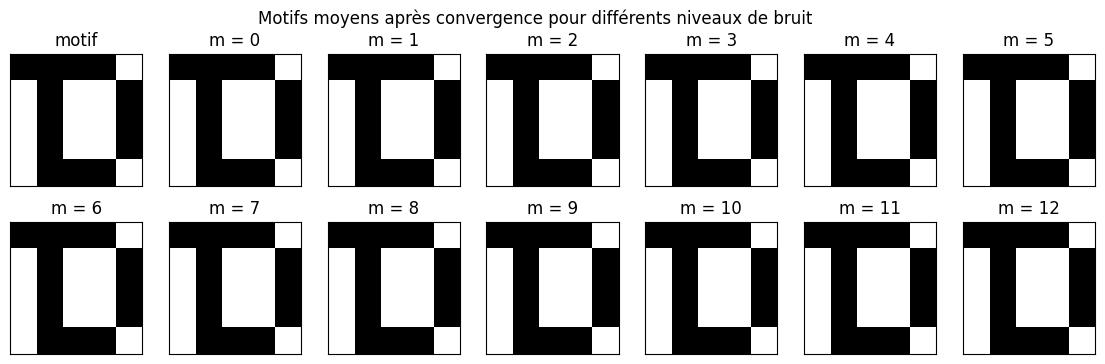

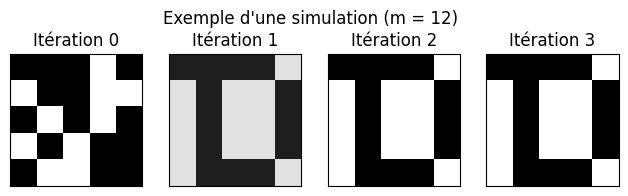

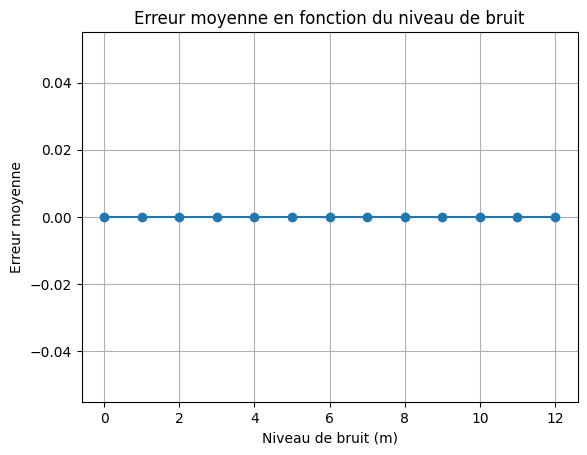

In [7]:
# Paramètres
K = pattern1.size  # Nombre de neurones
N = 1  # Nombre de motifs
num_simulations = 100  # Nombre de simulations pour chaque niveau de bruit
levels_of_noise = range(K // 2 + 1)  # Niveaux de bruit (de 0 à K/2)

Error, Images, Simulation = Hopfield(
    patterns[:N], noise_list=levels_of_noise, affichage=True
)

# Figure 1
# Motifs après convergence en fonction du bruit
fig = plt.figure(figsize=(14, 4))
fig.suptitle("Motifs moyens après convergence pour différents niveaux de bruit")
ax = fig.add_subplot(2, 7, 1)
ax.imshow(pattern1, cmap="gray")
ax.set_title("motif")
ax.set_xticks([])
ax.set_yticks([])

for m in range(levels_of_noise[-1] + 1):
    plt.subplot(2, 7, m + 2)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"m = {m}")
    plt.imshow(
        np.mean(Images[0][m], axis=0).reshape(pattern1.shape),
        cmap="gray",
        vmin=-1,
        vmax=1,
    )

plt.show()
print()

# Figure 2
# Example d'une convergence
fig = plt.figure(figsize=(14, 4))
fig.suptitle("Exemple d'une simulation (m = 12)", x=0.34)

for i in range(len(Simulation)):
    plt.subplot(2, 7, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Itération {i}")
    plt.imshow(Simulation[i].reshape(pattern1.shape), cmap="gray", vmin=-1, vmax=1)

plt.show()
print()

# Figure 3
# Représentation graphique de l'erreur moyenne en fonction du niveau de bruit
plt.plot(levels_of_noise, Error[0], marker="o")
plt.xlabel("Niveau de bruit (m)")
plt.ylabel("Erreur moyenne")
plt.title("Erreur moyenne en fonction du niveau de bruit")
plt.grid(True)
plt.show()

**Réponse 1** : On remarque que les différents niveaux de bruit n'ont pas d'influence sur la mémoire du modèle lorsqu'il ne contient qu'un seul motif. Cela est attendu car, puisqu'un seul motif a été encodé, il n'y a qu'un seul bassin attracteur. Il est donc logique que n'importe quel motif initial finisse par converger vers le motif appris.


Exemple d'une simulation et de la convergence du modèle en utilisant cette-fois ci la méthode d'Euler \(vu en TME\): elle est plus lente que celle utilisée plus haut mais elle permet ainsi de mieux visualiser la convergence du modèle. On peut noter qu'elle peut converger soit vers le motif, soit vers sont opposé, en fonction des conditions initiales.

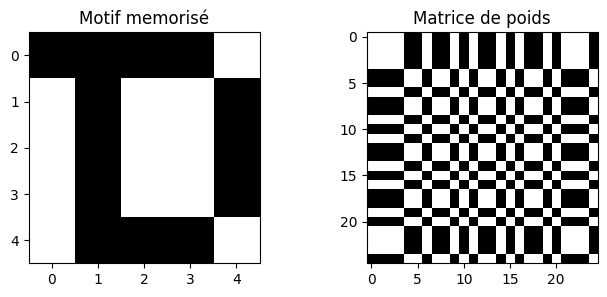

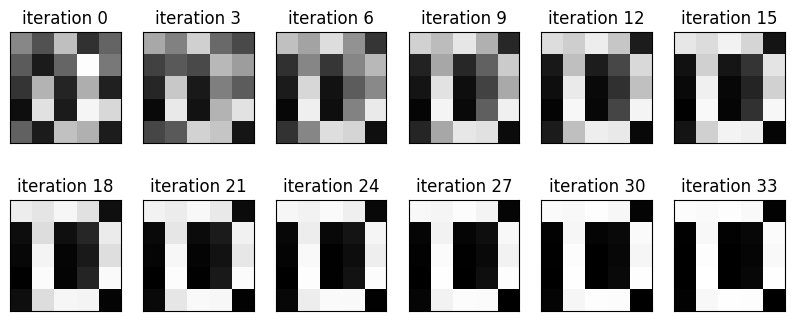

In [8]:
# le motif
plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.imshow(pattern1, cmap="gray", vmin=-1, vmax=1)
plt.title("Motif memorisé")

# pas d'entrées externes au réseau
x = 0

# matrice de poids
W = initialise_W([pattern1])
plt.subplot(122)
plt.imshow(W, cmap="gray")
plt.title("Matrice de poids")

# paramètres de simulation
dt = 0.1
tm = np.arange(0, 5, dt)
T = len(tm)
K = 25
y = np.zeros((T, K))  # pour chaque instant de temps, il y a vecteur y de N valeurs


# initialisation par un motif aléatoire
y[0, :] = np.random.uniform(-1, 1, K)
# y[0, :] = generate_noisy_pattern(pattern1, 12).flatten()

for t in range(1, T):
    # solution numérique par la méthode d'Euler
    y[t, :] = y[t - 1, :] + dt * (-y[t - 1, :] + g(np.dot(W, y[t - 1, :]) + x))

# visualiser les états du système dans pendant la dynamique
plt.figure(figsize=(10, 4))

pas_de_temps = 3
for i in range(12):
    plt.subplot(2, 6, i + 1)
    state = y[i * pas_de_temps, :].reshape(5, 5)
    plt.imshow(state, cmap="binary", vmin=-1, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("iteration %d" % (i * pas_de_temps))

#
2. Répéter la même procédure pour $N = 2, ..., 6$ et représenter sur le même graphique l'erreur moyenne en fonction de bruit pour différentes valeurs de $N$. Si l'on fixe le niveau de bruit à 6 pixels, combien de motifs le réseaux de 25 neurones est capable de sauvegarder avec l'erreur de mémoire < 1 pixel en moyenne ?

In [77]:
# QUESTION 2 :

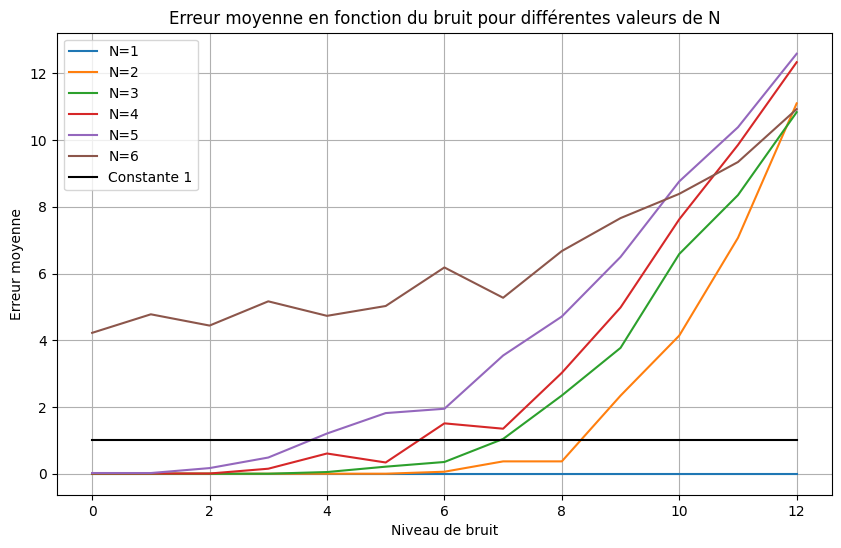

In [9]:
num_simulations = 100
noise_range = range(13)
N_max = 6
K = 25
Error_matrix = Hopfield(patterns, num_simulations, noise_list=noise_range)

# Affichage
plt.figure(figsize=(10, 6))
for N, errors in zip(range(1, N_max + 1), Error_matrix):
    plt.plot(range(len(noise_range)), errors, label=f"N={N}")
plt.plot(
    range(len(noise_range)),
    np.ones(len(noise_range)),
    color="black",
    label="Constante 1",
)
plt.xlabel("Niveau de bruit")
plt.ylabel("Erreur moyenne")
plt.title("Erreur moyenne en fonction du bruit pour différentes valeurs de N")
plt.legend()
plt.grid(True)
plt.show()

Avec 100 simulations, on peut voir que pour un niveau de bruit m = 6, le réseau peut retenir entre 3 et 4 motifs avec une moyenne d'erreur de mémoire < 1 pixel. Si on relance le modèle, on peut voir que la courbe N=4 descend parfois en dessous de 1 pour m = 6. On peut estimer la moyenne de l'erreur de manière plus précise en augmentant le nombre de simulations :

In [10]:
num_sim = 20000
Error_6 = Hopfield(patterns, num_simulations=num_sim, noise_list=[6])

print(
    f"Avec {num_sim} simulations, la moyenne d'erreur du modèle pour N = 4 et m = 6 est d'environ {Error_6[3][0]}."
)
print(
    f"En moyenne, le réseau peut donc retenir {np.count_nonzero(Error_6 < 1)} motifs pour m = 6."
)

Avec 20000 simulations, la moyenne d'erreur du modèle pour N = 4 et m = 6 est d'environ 1.1394395534350794.
En moyenne, le réseau peut donc retenir 3 motifs pour m = 6.


#
3. On définit la capacité du réseau par le nombre maximal des motifs mémorisés (sans bruit, $m = 0$, et avec l'erreur de mémoire < 1 pixel), divisé par le nombre de neurones dans le réseau : $C = \frac{N{_{max}}}{K}$. Quelle est la capacité $C$ du réseau sans bruit ?

In [ ]:
# QUESTION 3 :

In [11]:
# Capacité du réseau Hopfield
def cap_network(N_max, K):
    return N_max / K


Error_matrix = Hopfield(patterns, num_simulations, noise_range)
N_max = np.count_nonzero(Error_matrix[:, 0] < 1)

print(f"Le réseau peut mémoriser {N_max} motifs sans bruit (m = 0).")
print(f"La capacité C du réseau est donc de {cap_network(N_max, 25)}.")

Le réseau peut mémoriser 5 motifs sans bruit (m = 0).
La capacité C du réseau est donc de 0.2.


#
### Littérature recommandée
*MacKay, D. (2003). Information theory, inference and learning algorithms. Chapter 42. Hopfield networks.*